In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import math

In [2]:
csvs = ['nasdaq_screener_1685729611962.csv','nasdaq_screener_1685729316139.csv', 'nasdaq_screener_1685729644309.csv',
'nasdaq_screener_1685729362138.csv', 'nasdaq_screener_1685729666989.csv', 'nasdaq_screener_1685729424243.csv', 'nasdaq_screener_1685729708105.csv',
'nasdaq_screener_1685729454561.csv', 'nasdaq_screener_1685729730816.csv',
'nasdaq_screener_1685729483889.csv',
'nasdaq_screener_1685729579410.csv']

sector_to_symbol_dict = {} #maps sector to list of companies in that sector 

for csv in csvs:
    df = pd.read_csv(csv)
    for idx, row in df.iterrows():
        sector = row['Sector']
        sym = row['Symbol']
        
        if sector in sector_to_symbol_dict.keys():
            sector_to_symbol_dict[sector].append(sym)
        else:
            sector_to_symbol_dict[sector] = [sym]

In [3]:
sector_to_etf_dict = {} #maps sector to representative ETF
sector_to_etf_dict['Technology'] = 'XLK'
sector_to_etf_dict['Healthcare'] = 'XLV'
sector_to_etf_dict['Energy'] = 'XLE'
sector_to_etf_dict['Financials'] = 'XLF'
sector_to_etf_dict['Consumer Staples'] = 'XLP'
sector_to_etf_dict['Utilities'] = 'XLU'
sector_to_etf_dict['Consumer Discretionary'] = 'XLY'
sector_to_etf_dict['Basic Materials'] = 'XLB'
sector_to_etf_dict['Industrials'] = 'VIS'
sector_to_etf_dict['Telecommunications'] = 'VOX'
sector_to_etf_dict['Real Estate'] = 'XLRE'

In [4]:
sectors = list(sector_to_etf_dict.keys())
sectors

['Technology',
 'Healthcare',
 'Energy',
 'Financials',
 'Consumer Staples',
 'Utilities',
 'Consumer Discretionary',
 'Basic Materials',
 'Industrials',
 'Telecommunications',
 'Real Estate']

# Tech

In [5]:
tech_etf = sector_to_etf_dict['Technology']
tech_etf_df = yf.Ticker(tech_etf).history(period='max')

index = tech_etf_df.index
months = []
years = []
days = []

for dt in index:
    months.append(int(dt.month))
    years.append(int(dt.year))
    days.append(int(dt.day))

tech_etf_df['Month'] = pd.Series(months, index = index, dtype='int')
tech_etf_df['Year'] = pd.Series(years, index = index, dtype='int')
tech_etf_df['Day'] = pd.Series(days, index = index, dtype='int')

tech_etf_df.reset_index(drop=True, inplace=True)

In [6]:
tech_equities = sector_to_symbol_dict['Technology']
tech_eq_dfs = {}

for s in tech_equities:
    try:
        if s[len(s)-1] == 'W':
            continue
        dt = yf.Ticker(s).history(period='max').index[0]
        if pd.Timestamp(year=dt.year, month=dt.month, day=dt.day) > pd.Timestamp(year=int(tech_etf_df.iloc[0]['Year']), month = int(tech_etf_df.iloc[0]['Month']), day = int(tech_etf_df.iloc[0]['Day'])):
            df = yf.Ticker(s).history(period='max')
        else:
            if tech_etf_df.iloc[0]['Day'] < 10:
                df = yf.Ticker(s).history(start=str(int(tech_etf_df.iloc[0]['Year']))+'-'+str(int(tech_etf_df.iloc[0]['Month']))+'-0'+str(int(tech_etf_df.iloc[0]['Day'])))
            else:
                df = yf.Ticker(s).history(start=str(int(tech_etf_df.iloc[0]['Year']))+'-'+str(int(tech_etf_df.iloc[0]['Month']))+'-'+str(int(tech_etf_df.iloc[0]['Day'])))

        index = df.index
        months = []
        years = []
        days = []

        for dt in index:
            months.append(dt.month)
            years.append(dt.year)
            days.append(dt.day)

        df['Year'] = pd.Series(years, index = index)
        df['Month'] = pd.Series(months, index = index)
        df['Day'] = pd.Series(days, index = index)

        df.reset_index(drop=True, inplace=True)

        df = df.merge(right=tech_etf_df,how='inner',on=['Year','Month','Day'],suffixes=[None,' ETF'])
        tech_eq_dfs[s] = df
    except:
        continue 

LIFWZ: 1d data not available for startTime=-2208994789 and endTime=1686070495. Only 100 years worth of day granularity data are allowed to be fetched per request.


# Healthcare

In [7]:
hc_etf = sector_to_etf_dict['Healthcare']
hc_etf_df = yf.Ticker(hc_etf).history(period='max')

index = hc_etf_df.index
months = []
years = []
days = []

for dt in index:
    months.append(int(dt.month))
    years.append(int(dt.year))
    days.append(int(dt.day))

hc_etf_df['Month'] = pd.Series(months, index = index, dtype='int')
hc_etf_df['Year'] = pd.Series(years, index = index, dtype='int')
hc_etf_df['Day'] = pd.Series(days, index = index, dtype='int')

hc_etf_df.reset_index(drop=True, inplace=True)

In [8]:
hc_equities = sector_to_symbol_dict['Health Care']
hc_eq_dfs = {}

for idx in range(len(hc_equities)):
    s = hc_equities[idx]
    if idx % 100 == 0:
        print(idx)
    try:
        if len(s) >= 5:
            continue
        dt = yf.Ticker(s).history(period='max').index[0]
        if pd.Timestamp(year=dt.year, month=dt.month, day=dt.day) > pd.Timestamp(year=int(hc_etf_df.iloc[0]['Year']), month = int(hc_etf_df.iloc[0]['Month']), day = int(hc_etf_df.iloc[0]['Day'])):
            df = yf.Ticker(s).history(period='max')
        else:
            if hc_etf_df.iloc[0]['Day'] < 10:
                df = yf.Ticker(s).history(start=str(int(hc_etf_df.iloc[0]['Year']))+'-'+str(int(hc_etf_df.iloc[0]['Month']))+'-0'+str(int(hc_etf_df.iloc[0]['Day'])))
            else:
                df = yf.Ticker(s).history(start=str(int(hc_etf_df.iloc[0]['Year']))+'-'+str(int(hc_etf_df.iloc[0]['Month']))+'-'+str(int(hc_etf_df.iloc[0]['Day'])))

        index = df.index
        months = []
        years = []
        days = []

        for dt in index:
            months.append(dt.month)
            years.append(dt.year)
            days.append(dt.day)

        df['Year'] = pd.Series(years, index = index)
        df['Month'] = pd.Series(months, index = index)
        df['Day'] = pd.Series(days, index = index)

        df.reset_index(drop=True, inplace=True)

        df = df.merge(right=hc_etf_df,how='inner',on=['Year','Month','Day'],suffixes=[None,' ETF'])
        hc_eq_dfs[s] = df
    except:
        continue
    
    

0
100
200
300
400
500
600
700
800
900
1000


# Energy

In [9]:
energy_etf = sector_to_etf_dict['Energy']
energy_etf_df = yf.Ticker(energy_etf).history(period='max')

index = energy_etf_df.index
months = []
years = []
days = []

for dt in index:
    months.append(int(dt.month))
    years.append(int(dt.year))
    days.append(int(dt.day))

energy_etf_df['Month'] = pd.Series(months, index = index, dtype='int')
energy_etf_df['Year'] = pd.Series(years, index = index, dtype='int')
energy_etf_df['Day'] = pd.Series(days, index = index, dtype='int')

energy_etf_df.reset_index(drop=True, inplace=True)

In [10]:
energy_equities = sector_to_symbol_dict['Energy']
energy_eq_dfs = {}

for idx in range(len(energy_equities)):
    if idx % 50 == 0:
        print(idx)
    s = energy_equities[idx]
    try:
        if len(s) >= 5:
            continue
        dt = yf.Ticker(s).history(period='max').index[0]
        if pd.Timestamp(year=dt.year, month=dt.month, day=dt.day) > pd.Timestamp(year=int(energy_etf_df.iloc[0]['Year']), month = int(energy_etf_df.iloc[0]['Month']), day = int(energy_etf_df.iloc[0]['Day'])):
            df = yf.Ticker(s).history(period='max')
        else:
            if energy_etf_df.iloc[0]['Day'] < 10:
                df = yf.Ticker(s).history(start=str(int(energy_etf_df.iloc[0]['Year']))+'-'+str(int(energy_etf_df.iloc[0]['Month']))+'-0'+str(int(energy_etf_df.iloc[0]['Day'])))
            else:
                df = yf.Ticker(s).history(start=str(int(energy_etf_df.iloc[0]['Year']))+'-'+str(int(energy_etf_df.iloc[0]['Month']))+'-'+str(int(energy_etf_df.iloc[0]['Day'])))

        index = df.index
        months = []
        years = []
        days = []

        for dt in index:
            months.append(dt.month)
            years.append(dt.year)
            days.append(dt.day)

        df['Year'] = pd.Series(years, index = index)
        df['Month'] = pd.Series(months, index = index)
        df['Day'] = pd.Series(days, index = index)

        df.reset_index(drop=True, inplace=True)

        df = df.merge(right=energy_etf_df,how='inner',on=['Year','Month','Day'],suffixes=[None,' ETF'])
        energy_eq_dfs[s] = df
    except:
        continue
    
    

0
50
100
150


# Financials

In [11]:
fin_etf = sector_to_etf_dict['Financials']
fin_etf_df = yf.Ticker(fin_etf).history(period='max')

index = fin_etf_df.index
months = []
years = []
days = []

for dt in index:
    months.append(int(dt.month))
    years.append(int(dt.year))
    days.append(int(dt.day))

fin_etf_df['Month'] = pd.Series(months, index = index, dtype='int')
fin_etf_df['Year'] = pd.Series(years, index = index, dtype='int')
fin_etf_df['Day'] = pd.Series(days, index = index, dtype='int')

fin_etf_df.reset_index(drop=True, inplace=True)

In [12]:
fin_equities = sector_to_symbol_dict['Finance']
fin_eq_dfs = {}

for idx in range(len(fin_equities)):
    if idx % 100 == 0:
        print(idx)
    s = fin_equities[idx]
    try:
        if len(s) >= 5:
            continue
        dt = yf.Ticker(s).history(period='max').index[0]
        if pd.Timestamp(year=dt.year, month=dt.month, day=dt.day) > pd.Timestamp(year=int(fin_etf_df.iloc[0]['Year']), month = int(fin_etf_df.iloc[0]['Month']), day = int(fin_etf_df.iloc[0]['Day'])):
            df = yf.Ticker(s).history(period='max')
        else:
            if fin_etf_df.iloc[0]['Day'] < 10:
                df = yf.Ticker(s).history(start=str(int(fin_etf_df.iloc[0]['Year']))+'-'+str(int(fin_etf_df.iloc[0]['Month']))+'-0'+str(int(fin_etf_df.iloc[0]['Day'])))
            else:
                df = yf.Ticker(s).history(start=str(int(fin_etf_df.iloc[0]['Year']))+'-'+str(int(fin_etf_df.iloc[0]['Month']))+'-'+str(int(fin_etf_df.iloc[0]['Day'])))

        index = df.index
        months = []
        years = []
        days = []

        for dt in index:
            months.append(dt.month)
            years.append(dt.year)
            days.append(dt.day)

        df['Year'] = pd.Series(years, index = index)
        df['Month'] = pd.Series(months, index = index)
        df['Day'] = pd.Series(days, index = index)

        df.reset_index(drop=True, inplace=True)

        df = df.merge(right=fin_etf_df,how='inner',on=['Year','Month','Day'],suffixes=[None,' ETF'])
        fin_eq_dfs[s] = df
    except:
        continue
    

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
SFB: 1d data not available for startTime=-2208994789 and endTime=1686071634. Only 100 years worth of day granularity data are allowed to be fetched per request.
1400
1500


# Consumer Staples

In [13]:
cs_etf = sector_to_etf_dict['Consumer Staples']
cs_etf_df = yf.Ticker(cs_etf).history(period='max')

index = cs_etf_df.index
months = []
years = []
days = []

for dt in index:
    months.append(int(dt.month))
    years.append(int(dt.year))
    days.append(int(dt.day))

cs_etf_df['Month'] = pd.Series(months, index = index, dtype='int')
cs_etf_df['Year'] = pd.Series(years, index = index, dtype='int')
cs_etf_df['Day'] = pd.Series(days, index = index, dtype='int')

cs_etf_df.reset_index(drop=True, inplace=True)

In [14]:
cs_equities = sector_to_symbol_dict['Consumer Staples']
cs_eq_dfs = {}

for idx in range(len(cs_equities)):
    if idx % 10 == 0:
        print(idx)
    s = cs_equities[idx]
    try:
        if len(s) >= 5:
            continue
        dt = yf.Ticker(s).history(period='max').index[0]
        if pd.Timestamp(year=dt.year, month=dt.month, day=dt.day) > pd.Timestamp(year=int(cs_etf_df.iloc[0]['Year']), month = int(cs_etf_df.iloc[0]['Month']), day = int(cs_etf_df.iloc[0]['Day'])):
            df = yf.Ticker(s).history(period='max')
        else:
            if cs_etf_df.iloc[0]['Day'] < 10:
                df = yf.Ticker(s).history(start=str(int(cs_etf_df.iloc[0]['Year']))+'-'+str(int(cs_etf_df.iloc[0]['Month']))+'-0'+str(int(cs_etf_df.iloc[0]['Day'])))
            else:
                df = yf.Ticker(s).history(start=str(int(cs_etf_df.iloc[0]['Year']))+'-'+str(int(cs_etf_df.iloc[0]['Month']))+'-'+str(int(cs_etf_df.iloc[0]['Day'])))

        index = df.index
        months = []
        years = []
        days = []

        for dt in index:
            months.append(dt.month)
            years.append(dt.year)
            days.append(dt.day)

        df['Year'] = pd.Series(years, index = index)
        df['Month'] = pd.Series(months, index = index)
        df['Day'] = pd.Series(days, index = index)

        df.reset_index(drop=True, inplace=True)

        df = df.merge(right=cs_etf_df,how='inner',on=['Year','Month','Day'],suffixes=[None,' ETF'])
        cs_eq_dfs[s] = df
    except:
        continue

0
10
20
30
40
50
60
70
80
90
100


# Utilities

In [15]:
util_etf = sector_to_etf_dict['Utilities']
util_etf_df = yf.Ticker(util_etf).history(period='max')

index = util_etf_df.index
months = []
years = []
days = []

for dt in index:
    months.append(int(dt.month))
    years.append(int(dt.year))
    days.append(int(dt.day))

util_etf_df['Month'] = pd.Series(months, index = index, dtype='int')
util_etf_df['Year'] = pd.Series(years, index = index, dtype='int')
util_etf_df['Day'] = pd.Series(days, index = index, dtype='int')

util_etf_df.reset_index(drop=True, inplace=True)

In [16]:
util_equities = sector_to_symbol_dict['Utilities']
util_eq_dfs = {}

for idx in range(len(util_equities)):
    if idx % 10 == 0:
        print(idx)
    s = util_equities[idx]
    try:
        if len(s) >= 5:
            continue
        dt = yf.Ticker(s).history(period='max').index[0]
        if pd.Timestamp(year=dt.year, month=dt.month, day=dt.day) > pd.Timestamp(year=int(util_etf_df.iloc[0]['Year']), month = int(util_etf_df.iloc[0]['Month']), day = int(util_etf_df.iloc[0]['Day'])):
            df = yf.Ticker(s).history(period='max')
        else:
            if util_etf_df.iloc[0]['Day'] < 10:
                df = yf.Ticker(s).history(start=str(int(util_etf_df.iloc[0]['Year']))+'-'+str(int(util_etf_df.iloc[0]['Month']))+'-0'+str(int(util_etf_df.iloc[0]['Day'])))
            else:
                df = yf.Ticker(s).history(start=str(int(util_etf_df.iloc[0]['Year']))+'-'+str(int(util_etf_df.iloc[0]['Month']))+'-'+str(int(util_etf_df.iloc[0]['Day'])))

        index = df.index
        months = []
        years = []
        days = []

        for dt in index:
            months.append(dt.month)
            years.append(dt.year)
            days.append(dt.day)

        df['Year'] = pd.Series(years, index = index)
        df['Month'] = pd.Series(months, index = index)
        df['Day'] = pd.Series(days, index = index)

        df.reset_index(drop=True, inplace=True)

        df = df.merge(right=util_etf_df,how='inner',on=['Year','Month','Day'],suffixes=[None,' ETF'])
        util_eq_dfs[s] = df
    except:
        continue
        

0
10
20
30
40
EAI: No data found for this date range, symbol may be delisted
50
60
70
80
90
100
110
120
130


# Consumer Discretionary

In [17]:
cd_etf = sector_to_etf_dict['Consumer Discretionary']
cd_etf_df = yf.Ticker(cd_etf).history(period='max')

index = cd_etf_df.index
months = []
years = []
days = []

for dt in index:
    months.append(int(dt.month))
    years.append(int(dt.year))
    days.append(int(dt.day))

cd_etf_df['Month'] = pd.Series(months, index = index, dtype='int')
cd_etf_df['Year'] = pd.Series(years, index = index, dtype='int')
cd_etf_df['Day'] = pd.Series(days, index = index, dtype='int')

cd_etf_df.reset_index(drop=True, inplace=True)

In [18]:
cd_equities = sector_to_symbol_dict['Consumer Discretionary']
cd_eq_dfs = {}

for idx in range(len(cd_equities)):
    if idx % 100 == 0:
        print(idx)
    s = cd_equities[idx]
    try:
        if len(s) >= 5:
            continue
        dt = yf.Ticker(s).history(period='max').index[0]
        if pd.Timestamp(year=dt.year, month=dt.month, day=dt.day) > pd.Timestamp(year=int(cd_etf_df.iloc[0]['Year']), month = int(cd_etf_df.iloc[0]['Month']), day = int(cd_etf_df.iloc[0]['Day'])):
            df = yf.Ticker(s).history(period='max')
        else:
            if cd_etf_df.iloc[0]['Day'] < 10:
                df = yf.Ticker(s).history(start=str(int(cd_etf_df.iloc[0]['Year']))+'-'+str(int(cd_etf_df.iloc[0]['Month']))+'-0'+str(int(cd_etf_df.iloc[0]['Day'])))
            else:
                df = yf.Ticker(s).history(start=str(int(cd_etf_df.iloc[0]['Year']))+'-'+str(int(cd_etf_df.iloc[0]['Month']))+'-'+str(int(cd_etf_df.iloc[0]['Day'])))

        index = df.index
        months = []
        years = []
        days = []

        for dt in index:
            months.append(dt.month)
            years.append(dt.year)
            days.append(dt.day)

        df['Year'] = pd.Series(years, index = index)
        df['Month'] = pd.Series(months, index = index)
        df['Day'] = pd.Series(days, index = index)

        df.reset_index(drop=True, inplace=True)

        df = df.merge(right=cd_etf_df,how='inner',on=['Year','Month','Day'],suffixes=[None,' ETF'])
        cd_eq_dfs[s] = df
    except:
        continue
    

0
100
CSGP: Error occurred while retrieving timeseries from Redis, keys: [RedisKey [key=CSGP, cluster=finance]]
200
300
400
500
600
700
800


# Basic Materials

In [19]:
bm_etf = sector_to_etf_dict['Basic Materials']
bm_etf_df = yf.Ticker(bm_etf).history(period='max')

index = bm_etf_df.index
months = []
years = []
days = []

for dt in index:
    months.append(int(dt.month))
    years.append(int(dt.year))
    days.append(int(dt.day))

bm_etf_df['Month'] = pd.Series(months, index = index, dtype='int')
bm_etf_df['Year'] = pd.Series(years, index = index, dtype='int')
bm_etf_df['Day'] = pd.Series(days, index = index, dtype='int')

bm_etf_df.reset_index(drop=True, inplace=True)

In [20]:
bm_equities = sector_to_symbol_dict['Basic Materials']
bm_eq_dfs = {}

for idx in range(len(bm_equities)):
    if idx % 100 == 0:
        print(idx)
    s = bm_equities[idx]
    try:
        if len(s) >= 5:
            continue
        dt = yf.Ticker(s).history(period='max').index[0]
        if pd.Timestamp(year=dt.year, month=dt.month, day=dt.day) > pd.Timestamp(year=int(bm_etf_df.iloc[0]['Year']), month = int(bm_etf_df.iloc[0]['Month']), day = int(bm_etf_df.iloc[0]['Day'])):
            df = yf.Ticker(s).history(period='max')
        else:
            if bm_etf_df.iloc[0]['Day'] < 10:
                df = yf.Ticker(s).history(start=str(int(bm_etf_df.iloc[0]['Year']))+'-'+str(int(bm_etf_df.iloc[0]['Month']))+'-0'+str(int(bm_etf_df.iloc[0]['Day'])))
            else:
                df = yf.Ticker(s).history(start=str(int(bm_etf_df.iloc[0]['Year']))+'-'+str(int(bm_etf_df.iloc[0]['Month']))+'-'+str(int(bm_etf_df.iloc[0]['Day'])))

        index = df.index
        months = []
        years = []
        days = []

        for dt in index:
            months.append(dt.month)
            years.append(dt.year)
            days.append(dt.day)

        df['Year'] = pd.Series(years, index = index)
        df['Month'] = pd.Series(months, index = index)
        df['Day'] = pd.Series(days, index = index)

        df.reset_index(drop=True, inplace=True)

        df = df.merge(right=bm_etf_df,how='inner',on=['Year','Month','Day'],suffixes=[None,' ETF'])
        bm_eq_dfs[s] = df
    except:
        continue

0


# Industrials

In [21]:
ind_etf = sector_to_etf_dict['Industrials']
ind_etf_df = yf.Ticker(ind_etf).history(period='max')

index = ind_etf_df.index
months = []
years = []
days = []

for dt in index:
    months.append(int(dt.month))
    years.append(int(dt.year))
    days.append(int(dt.day))

ind_etf_df['Month'] = pd.Series(months, index = index, dtype='int')
ind_etf_df['Year'] = pd.Series(years, index = index, dtype='int')
ind_etf_df['Day'] = pd.Series(days, index = index, dtype='int')

ind_etf_df.reset_index(drop=True, inplace=True)

In [22]:
ind_equities = sector_to_symbol_dict['Industrials']
ind_eq_dfs = {}

for idx in range(len(ind_equities)):
    if idx % 100 == 0:
        print(idx)
    s = ind_equities[idx]
    try:
        if len(s) >= 5:
            continue
        dt = yf.Ticker(s).history(period='max').index[0]
        if pd.Timestamp(year=dt.year, month=dt.month, day=dt.day) > pd.Timestamp(year=int(ind_etf_df.iloc[0]['Year']), month = int(ind_etf_df.iloc[0]['Month']), day = int(ind_etf_df.iloc[0]['Day'])):
            df = yf.Ticker(s).history(period='max')
        else:
            if ind_etf_df.iloc[0]['Day'] < 10:
                df = yf.Ticker(s).history(start=str(int(ind_etf_df.iloc[0]['Year']))+'-'+str(int(ind_etf_df.iloc[0]['Month']))+'-0'+str(int(ind_etf_df.iloc[0]['Day'])))
            else:
                df = yf.Ticker(s).history(start=str(int(ind_etf_df.iloc[0]['Year']))+'-'+str(int(ind_etf_df.iloc[0]['Month']))+'-'+str(int(ind_etf_df.iloc[0]['Day'])))

        index = df.index
        months = []
        years = []
        days = []

        for dt in index:
            months.append(dt.month)
            years.append(dt.year)
            days.append(dt.day)

        df['Year'] = pd.Series(years, index = index)
        df['Month'] = pd.Series(months, index = index)
        df['Day'] = pd.Series(days, index = index)

        df.reset_index(drop=True, inplace=True)

        df = df.merge(right=ind_etf_df,how='inner',on=['Year','Month','Day'],suffixes=[None,' ETF'])
        ind_eq_dfs[s] = df
    except:
        continue
    

0
100
200
300
400


# Telecommunications

In [23]:
tc_etf = sector_to_etf_dict['Telecommunications']
tc_etf_df = yf.Ticker(tc_etf).history(period='max')

index = tc_etf_df.index
months = []
years = []
days = []

for dt in index:
    months.append(int(dt.month))
    years.append(int(dt.year))
    days.append(int(dt.day))

tc_etf_df['Month'] = pd.Series(months, index = index, dtype='int')
tc_etf_df['Year'] = pd.Series(years, index = index, dtype='int')
tc_etf_df['Day'] = pd.Series(days, index = index, dtype='int')

tc_etf_df.reset_index(drop=True, inplace=True)

In [24]:
tc_equities = sector_to_symbol_dict['Telecommunications']
tc_eq_dfs = {}

for idx in range(len(tc_equities)):
    if idx % 100 == 0:
        print(idx)
    s = tc_equities[idx]
    try:
        if len(s) >= 5:
            continue
        dt = yf.Ticker(s).history(period='max').index[0]
        if pd.Timestamp(year=dt.year, month=dt.month, day=dt.day) > pd.Timestamp(year=int(tc_etf_df.iloc[0]['Year']), month = int(tc_etf_df.iloc[0]['Month']), day = int(tc_etf_df.iloc[0]['Day'])):
            df = yf.Ticker(s).history(period='max')
        else:
            if tc_etf_df.iloc[0]['Day'] < 10:
                df = yf.Ticker(s).history(start=str(int(tc_etf_df.iloc[0]['Year']))+'-'+str(int(tc_etf_df.iloc[0]['Month']))+'-0'+str(int(tc_etf_df.iloc[0]['Day'])))
            else:
                df = yf.Ticker(s).history(start=str(int(tc_etf_df.iloc[0]['Year']))+'-'+str(int(tc_etf_df.iloc[0]['Month']))+'-'+str(int(tc_etf_df.iloc[0]['Day'])))

        index = df.index
        months = []
        years = []
        days = []

        for dt in index:
            months.append(dt.month)
            years.append(dt.year)
            days.append(dt.day)

        df['Year'] = pd.Series(years, index = index)
        df['Month'] = pd.Series(months, index = index)
        df['Day'] = pd.Series(days, index = index)

        df.reset_index(drop=True, inplace=True)

        df = df.merge(right=tc_etf_df,how='inner',on=['Year','Month','Day'],suffixes=[None,' ETF'])
        tc_eq_dfs[s] = df
    except:
        continue
        

0


# Real Estate

In [25]:
re_etf = sector_to_etf_dict['Real Estate']
re_etf_df = yf.Ticker(re_etf).history(period='max')

index = re_etf_df.index
months = []
years = []
days = []

for dt in index:
    months.append(int(dt.month))
    years.append(int(dt.year))
    days.append(int(dt.day))

re_etf_df['Month'] = pd.Series(months, index = index, dtype='int')
re_etf_df['Year'] = pd.Series(years, index = index, dtype='int')
re_etf_df['Day'] = pd.Series(days, index = index, dtype='int')

re_etf_df.reset_index(drop=True, inplace=True)

In [26]:
re_equities = sector_to_symbol_dict['Real Estate']
re_eq_dfs = {}

for idx in range(len(re_equities)):
    if idx % 100 == 0:
        print(idx)
    s = re_equities[idx]
    try:
        if len(s) >= 5:
            continue
        dt = yf.Ticker(s).history(period='max').index[0]
        if pd.Timestamp(year=dt.year, month=dt.month, day=dt.day) > pd.Timestamp(year=int(re_etf_df.iloc[0]['Year']), month = int(re_etf_df.iloc[0]['Month']), day = int(re_etf_df.iloc[0]['Day'])):
            df = yf.Ticker(s).history(period='max')
        else:
            if re_etf_df.iloc[0]['Day'] < 10:
                df = yf.Ticker(s).history(start=str(int(re_etf_df.iloc[0]['Year']))+'-'+str(int(re_etf_df.iloc[0]['Month']))+'-0'+str(int(re_etf_df.iloc[0]['Day'])))
            else:
                df = yf.Ticker(s).history(start=str(int(re_etf_df.iloc[0]['Year']))+'-'+str(int(re_etf_df.iloc[0]['Month']))+'-'+str(int(re_etf_df.iloc[0]['Day'])))

        index = df.index
        months = []
        years = []
        days = []

        for dt in index:
            months.append(dt.month)
            years.append(dt.year)
            days.append(dt.day)

        df['Year'] = pd.Series(years, index = index)
        df['Month'] = pd.Series(months, index = index)
        df['Day'] = pd.Series(days, index = index)

        df.reset_index(drop=True, inplace=True)

        df = df.merge(right=re_etf_df,how='inner',on=['Year','Month','Day'],suffixes=[None,' ETF'])
        re_eq_dfs[s] = df
    except:
        continue
    
    

0
100
RCA: No data found for this date range, symbol may be delisted
200


for each of the 11 stock sectors, I have a dictionary mapping symbol to price dataframe with ETF prices included in the dataframe for each stock

choose a lookback period during which data is used to form pairs; choose a trading period, during which pairs and trading rules that were formed based on lookback period, such that pairs trading occurs. For each asset, etf pair, loop thru all rolling windows of lookback period months. For each asset, etf pair and each rolling window and trading period, check that prices exceed some correlation threshold and that the residuals are stationary. Then, construct trading rules and pairs trade and record performance. Hyperparameters are lookback period length, trading period length, correlation threshold, and p-value for cointegration test. 

In [48]:
lookback = 6 #6 months
trading_period = 3 #3 months
corr_thresh = 0.9
pval_max = 0.01

In [36]:
def outsample_pairs_trade(spread, so, lo, sc, lc, max_pos_period):
    #so: short open point
    #lo: long open point
    #sc: short close point
    #lc: long close point
    #max_pos_period: maximum number of days you want the position to be open
    
    prof = 0
    num_trades = 0
    
    short = False
    long_ = False
    open_idx = 0
    
    for idx in range(spread.shape[0]):
        
        if short:
            #currently have an open position where we are shorting the spread
            
            if spread[idx] <= sc or idx - open_idx >= max_pos_period:
                #close the position
                short = False
                prof += spread[open_idx] - spread[idx]
            elif idx == spread.shape[0] - 1:
                #last day of data so close position
                prof += spread[open_idx] - spread[idx]
        
        elif long_:
            #currently have an open position where we are long-ing the spread
            
            if spread[idx] >= lc or idx - open_idx >= max_pos_period:
                #close
                long_ = False
                prof += spread[idx] - spread[open_idx]
            elif idx == spread.shape[0] - 1:
                #last day of data so close position
                prof += spread[idx] - spread[open_idx]
        else:
            
            #determine if we will open a position
            if spread[idx] >= so and idx < spread.shape[0] - 1:
                short = True
                open_idx = idx
                num_trades+=1
            elif spread[idx] <= lo and idx < spread.shape[0] - 1:
                long_ = True
                open_idx = idx
                num_trades+=1
                
    
    return prof, num_trades
    

# Tech

In [55]:
tech_trade_params = {} #maps (tech equities, start of window year-month tuple) tuple to values that need to be known to pairs trade [alpha, beta, mean, sd]
tech_equities = tech_eq_dfs.keys()
idx = 0
for s in tech_equities:
    idx+=1
    if idx % 50 == 0:
        print(idx*100/len(tech_equities))
    df = tech_eq_dfs[s]
    gbo = df.groupby(['Year','Month'])
    gb_keys = []
    for key, frame in gbo:
        gb_keys.append(key)
    for y_m_key in gb_keys[:-8]:
        lookback_df_list = [] 
        first_year = y_m_key[0]
        first_month = y_m_key[1]
        for i in range(6):
            cur_month = first_month + i
            if cur_month < 13:
                cur_year = first_year
            else:
                cur_month-=12
                cur_year = first_year+1
            cur_gp = gbo.get_group((cur_year,cur_month))
            lookback_df_list.append(cur_gp)
        lookback_df = lookback_df_list[0]
        for i in range(1,len(lookback_df_list)):
            lookback_df = pd.concat([lookback_df,lookback_df_list[i]],ignore_index=True)
        try:
            ols = sm.OLS(np.array(lookback_df['Close']),sm.add_constant(np.array(lookback_df['Close ETF']).reshape((-1,1))))
            res = ols.fit()
            alpha = res.params[0] #y-int
            beta = res.params[1]
            residuals = np.subtract(np.array(lookback_df['Close']),ols.predict(res.params)) + np.ones(lookback_df.shape[0])*res.params[0]
            cur_pval = adfuller(residuals)[1]
            corr_coef = np.corrcoef(np.hstack((np.array(lookback_df['Close']).reshape(-1),np.array(lookback_df['Close ETF']).reshape(-1))))
            below = False
            above = False
            crossings = 0
            if residuals[0] < mean:
                below = True
            else:
                above = True
            for r in residuals:
                if r > mean:
                    if below:
                        crossings+=1
                        above = True
                        below = False
                else:
                    if above:
                        below = True
                        above = False
                        crossings+=1
            if cur_pval <= pval_max and corr_coef >= corr_thresh  and crossings >= 15:
                #can trade spread
                mean = np.mean(residuals)
                sd = np.std(residuals)
                tech_trade_params[(s,(y_m_key))] = [alpha,beta,mean,sd,crossings]
        except:
            continue
        

9.523809523809524
19.047619047619047
28.571428571428573
38.095238095238095
47.61904761904762
57.142857142857146
66.66666666666667
76.19047619047619
85.71428571428571
95.23809523809524


In [50]:
tech_trade_params

{('AAOI', (2014, 2)): [0.7145961728471981,
  0.6314650667771645,
  0.7145961728471992,
  3.346095689137301],
 ('AAOI', (2017, 8)): [252.44824541984983,
  -3.487042945545287,
  252.4482454198498,
  7.028813129057809],
 ('AAOI', (2019, 7)): [1.8783926956631927,
  0.1060344143519301,
  1.8783926956632018,
  0.6625005209521069],
 ('AAOI', (2021, 6)): [19.277992347383716,
  -0.07803265290422287,
  19.27799234738371,
  0.5325550406772837],
 ('AAOI', (2021, 7)): [19.847091572144798,
  -0.08250929128383794,
  19.847091572144805,
  0.5525019708524365],
 ('AAOI', (2021, 11)): [-12.034998717324381,
  0.10427488500145682,
  -12.034998717324376,
  0.8325385316851367],
 ('AAOI', (2021, 12)): [-8.731220014270441,
  0.08167066995170413,
  -8.731220014270445,
  0.4457190739501039],
 ('AAPL', (1999, 10)): [-0.31099897360650564,
  0.028066873336942567,
  -0.31099897360650497,
  0.050873782292439544],
 ('AAPL', (2001, 11)): [0.5340966336564748,
  -0.01085388182540492,
  0.5340966336564744,
  0.02499954417

0.012941633234114146
0.02588326646822829
0.03882489970234244
0.05176653293645658
0.06470816617057072
0.07764979940468487
0.09059143263879901
0.10353306587291317
0.1164746991070273
0.12941633234114144


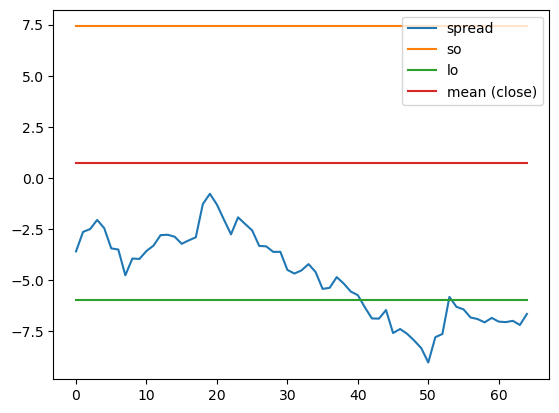

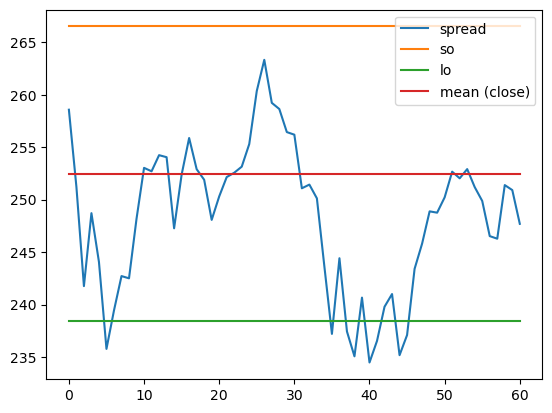

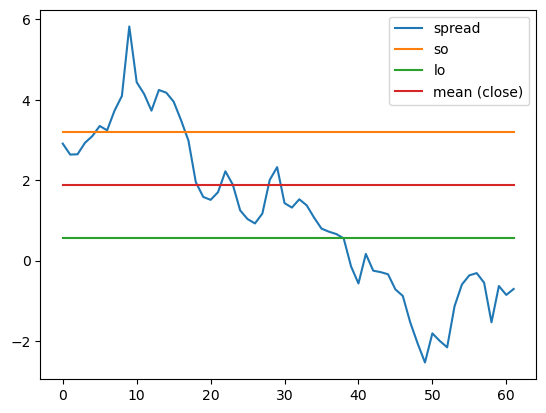

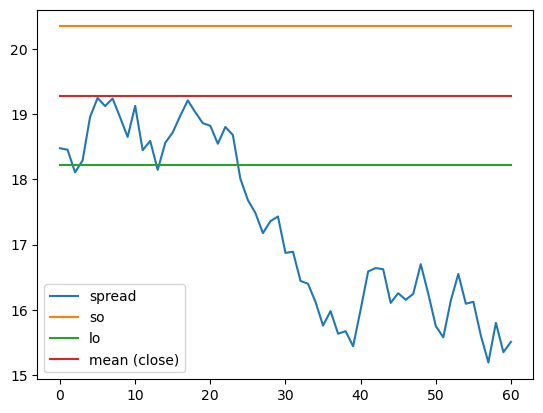

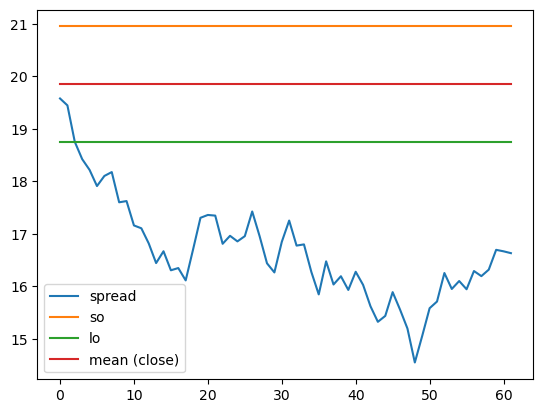

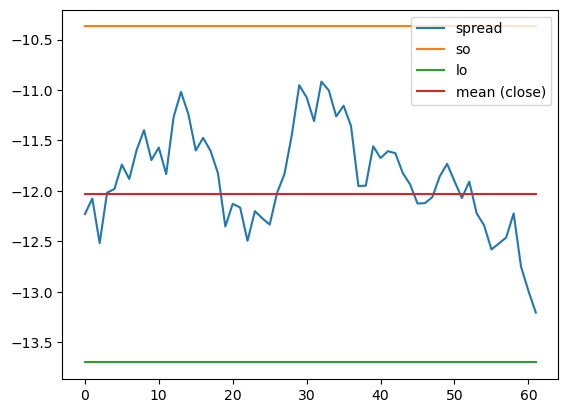

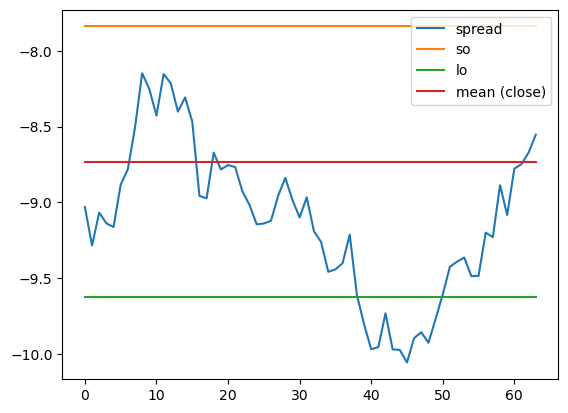

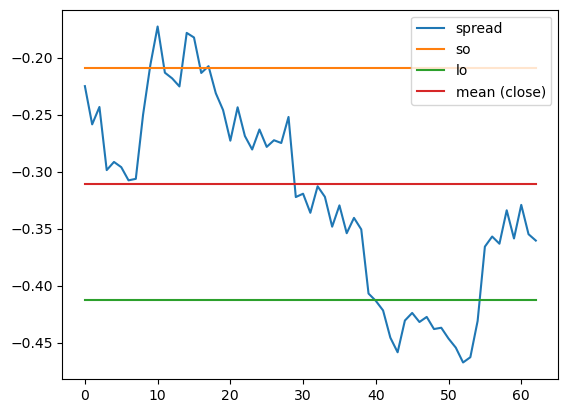

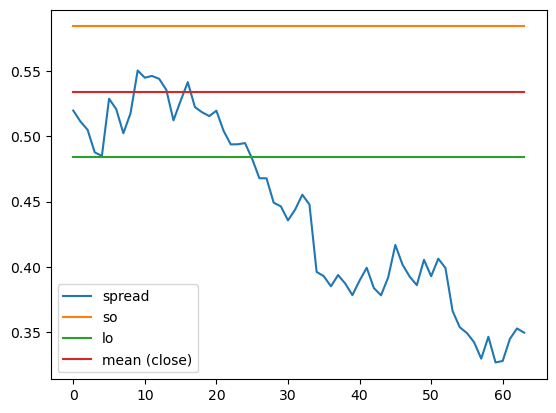

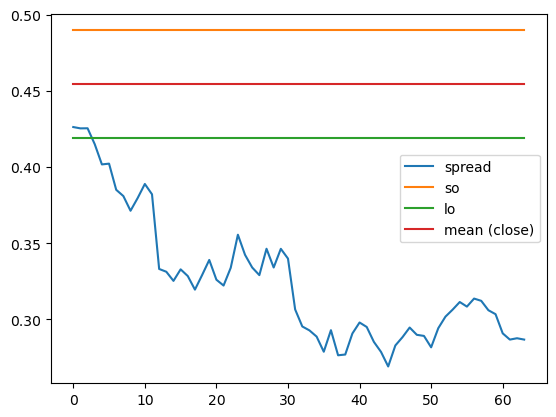

In [51]:
tech_window_prof = {}
idx = 0

for item in tech_trade_params.items():
    idx+=1
    print(idx*100/len(tech_trade_params.keys()))
    key = item[0]
    params = item[1]
    alpha = params[0]
    beta = params[1]
    mean = params[2]
    sd = params[3]
    s = key[0]
    y_m_tup = key[1] #start of 6 month lookback
    cur_year = y_m_tup[0]
    cur_month = y_m_tup[1]
    
    data = tech_eq_dfs[s]
    gpo = data.groupby(['Year','Month'])
    trading_pd_data = []
    
    for add_month in range(6,9):
        if cur_month + add_month > 12:
            new_month = cur_month + add_month - 12
            new_year = cur_year + 1
        else:
            new_month = cur_month + add_month
            new_year = cur_year
        trading_pd_data.append(gpo.get_group((new_year,new_month)))
    
    trading_data = trading_pd_data[0]
    for i in range(1,len(trading_pd_data)):
        trading_data = pd.concat([trading_data, trading_pd_data[i]], ignore_index=True)
    
    spread = np.subtract(np.array(trading_data['Close']), beta * np.array(trading_data['Close ETF']))
    so = mean + 2*sd
    lo = mean - 2*sd
    lc = mean
    sc = mean
    plt.figure()
    plt.plot(np.arange(trading_data.shape[0]),spread,label='spread')
    plt.plot(np.arange(trading_data.shape[0]),np.ones(trading_data.shape[0])*so,label='so')
    plt.plot(np.arange(trading_data.shape[0]),np.ones(trading_data.shape[0])*lo,label='lo')
    plt.plot(np.arange(trading_data.shape[0]),np.ones(trading_data.shape[0])*mean,label='mean (close)')
    plt.legend()
    
    
    if idx == 10:
        break
    
    prof, ntrades = outsample_pairs_trade(spread,so,lo,sc,lc,10000)
    tech_window_prof[key] = [prof,ntrades]
    

In [41]:
tech_window_prof

{('AAOI', (2014, 2)): [-0.31972390854683397, 1],
 ('AAOI', (2015, 6)): [1.8521628146904554, 1],
 ('AAOI', (2015, 7)): [0.628689679822628, 1],
 ('AAOI', (2016, 12)): [10.438386779422672, 2],
 ('AAOI', (2017, 1)): [9.419446656977641, 2],
 ('AAOI', (2017, 7)): [25.068183110976463, 1],
 ('AAOI', (2017, 8)): [32.71476994205713, 2],
 ('AAOI', (2017, 9)): [9.7462491936312, 2],
 ('AAOI', (2017, 10)): [12.654120689189682, 2],
 ('AAOI', (2018, 12)): [3.093277491048166, 1],
 ('AAOI', (2019, 5)): [2.145311344942389, 1],
 ('AAOI', (2019, 6)): [1.1057521597702689, 2],
 ('AAOI', (2019, 7)): [1.2026844478235308, 2],
 ('AAOI', (2021, 6)): [-2.598724234007406, 1],
 ('AAOI', (2021, 7)): [-1.7922977679091758, 1],
 ('AAOI', (2021, 11)): [0, 0],
 ('AAOI', (2021, 12)): [1.1317626628190567, 1],
 ('AAOI', (2022, 8)): [0, 0],
 ('AAPL', (1999, 8)): [0.06895643752086178, 1],
 ('AAPL', (1999, 9)): [0.1172495749214113, 1],
 ('AAPL', (1999, 10)): [0.16869793316822013, 2],
 ('AAPL', (1999, 11)): [0.20732771506316783,

In [42]:
sum_ = 0
for item in tech_window_prof.items():
    sum_+=item[1][0]
print(sum_)

-3625961925.0203266


# Healthcare

In [35]:
hc_trade_params = {} #maps (tech equities, start of window year-month tuple) tuple to values that need to be known to pairs trade [alpha, beta, mean, sd]
hc_equities = hc_eq_dfs.keys()
idx = 0
for s in hc_equities:
    idx+=1
    if idx % 50 == 0:
        print(idx*100/len(hc_equities))
    df = hc_eq_dfs[s]
    gbo = df.groupby(['Year','Month'])
    gb_keys = []
    for key, frame in gbo:
        gb_keys.append(key)
    for y_m_key in gb_keys[:-8]:
        lookback_df_list = [] 
        first_year = y_m_key[0]
        first_month = y_m_key[1]
        for i in range(6):
            cur_month = first_month + i
            if cur_month < 13:
                cur_year = first_year
            else:
                cur_month-=12
                cur_year = first_year+1
            cur_gp = gbo.get_group((cur_year,cur_month))
            lookback_df_list.append(cur_gp)
        lookback_df = lookback_df_list[0]
        for i in range(1,len(lookback_df_list)):
            lookback_df = pd.concat([lookback_df,lookback_df_list[i]],ignore_index=True)
        try:
            ols = sm.OLS(np.array(lookback_df['Close']),sm.add_constant(np.array(lookback_df['Close ETF']).reshape((-1,1))))
            res = ols.fit()
            alpha = res.params[0] #y-int
            beta = res.params[1]
            residuals = np.subtract(np.array(lookback_df['Close']),ols.predict(res.params)) + np.ones(lookback_df.shape[0])*res.params[0]
            cur_pval = adfuller(residuals)[1]
            corr_coef = np.corrcoef(np.hstack((np.array(lookback_df['Close']).reshape(-1),np.array(lookback_df['Close ETF']).reshape(-1))))
            if cur_pval <= pval_max and corr_coef >= corr_thresh:
                #can trade spread
                mean = np.mean(residuals)
                sd = np.std(residuals)
                hc_trade_params[(s,(y_m_key))] = [alpha,beta,mean,sd]
        except:
            continue
        

5.302226935312832
10.604453870625663
15.906680805938494
21.208907741251327
26.511134676564158
31.81336161187699
37.11558854718982
42.417815482502654
47.720042417815485
53.022269353128316
58.324496288441146
63.62672322375398
68.9289501590668
74.23117709437965
79.53340402969248
84.83563096500531
90.13785790031814
95.44008483563097


# Energy

# Financials

# Consumer Staples

# Utilities

# Consumer Discretionary

# Basic Materials

# Industrials

# Telecommunications 

# Real Estate